In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt

#Autoencoder for MNIST dtatset: Sequential Model

In [ ]:
#takes a list of flattened image data and plots the image list in rows
def plotDigits(x_img, cols=5):
  #pick five random indices from the sample range of the image data
  random_sample_indices = [np.random.randint(low=0, high=x_img[0].shape[0]) for i in range(5)]
  #select the five images
  random_sample_images = x_img[0][random_sample_indices, :]

  #number of rows to be plotted
  rows = len(x_img)
  #create subplot axes
  fig, ax = plt.subplots(nrows=rows, ncols=cols, squeeze=False)

  for row in range(rows):
    for i, index in enumerate(random_sample_indices):
      #the image pixels are in flattened array
      #reshape the pixel array to 28*28 dimension
      ax[row, i].imshow(x_img[row][index].reshape(28,28), cmap='gray')
      ax[row, i].grid=False
      ax[row, i].set_xticks([])
      ax[row, i].set_yticks([])

  return ax, fig

## Getting Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


[]

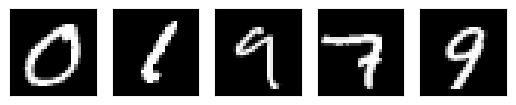

In [ ]:
#plot five random digits
ax, fig = plotDigits([x_train], cols=5)
plt.plot()

layer1 = keras.layers.Dense(28*28, activation='relu', name='hidden_layer1')
layer2 = keras.layers.Dense(1, activation='relu', name='hidden_layer2')
output = keras.layers.Dense(28*28, activation='relu', name='output_layer')

## Preprocessing input

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


In [ ]:
#flatten the pixel array of the images
def reshapeImage(images, normalize=False):
  images_reshaped = images.reshape((images.shape[0], images.shape[1]*images.shape[2]))

  if normalize:
    #reduce the range of values to [0,1]
    images_reshaped = images_reshaped.astype('float32')/255

  return images_reshaped

In [ ]:
#flatten and normalize the pixel values of the digits to [0,1]
x_train_reshaped = reshapeImage(x_train, normalize=True)
x_test_reshaped = reshapeImage(x_test, normalize=True)

In [ ]:
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

(60000, 784)
(10000, 784)


## Building a simple Autoencoder

In [ ]:
input_image_size = 28*28
#the size of the latent representation
latent_rep_size = 1

#create an input layer
input_images = keras.Input(shape=(input_image_size,), name='input_image')
#create an encoder. Here it consists of one layer only. So, this is just latent representation layer
encoder_l1 = keras.layers.Dense(latent_rep_size, activation='relu', name='encoder_layer1')(input_images)
#output layer
decoder_l1 = keras.layers.Dense(input_image_size, activation='sigmoid')(encoder_l1)

#build a sequential model using the three layers in sequence
model = keras.Model(inputs=input_images, outputs=decoder_l1, name='autoencoder')

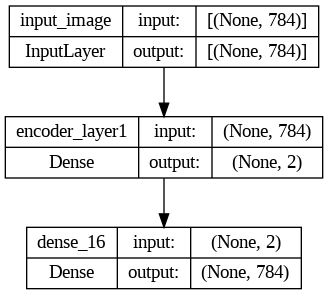

In [ ]:
#graph of the model
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
#compile the model to define the gradient update method and the loss function for training
model.compile(optimizer='adam', loss='mean_squared_error')
#fit the model using the flattened data
#input an output are same
model.fit(x_train_reshaped, x_train_reshaped, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0751
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0641
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0635
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0632
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0629
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0624
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0620
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0616
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0613


In [ ]:
#predict the output using test data
output = model.predict(x_test_reshaped)

313/313 [==============================] - 1s 2ms/step


In [ ]:
output.shape

(10000, 784)

[]

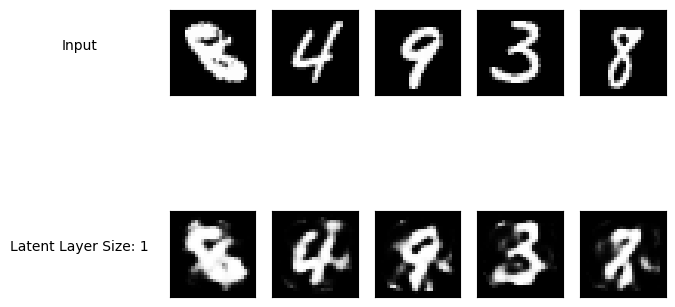

In [ ]:
#plot the input test image and its predicted output
labels = ['Input', 'Latent Layer Size: 1']

ax, plots = plotDigits([x_test_reshaped, output], cols=5)

for i in range(2):
  ax[i, 0].set_ylabel(labels[i], rotation='horizontal', labelpad=65)

plt.plot()

## Changing dimension of latent representation layer

The code varies the dimension of the latent layer from 1 in multiples of 2 upto 32. The output for each latent layer dimension is plotted.

In [ ]:
#number of different dimensions cases
num_layers = 6
#initialize the latent layer dimension to 1
layer_dim = 1

#create an empty list to store model and output for each latent layer dimension
models = []
outputs = []

for layer in range(num_layers):
  #create the latent layer
  encoder_l1 = keras.layers.Dense(layer_dim, activation='relu', name='encoder_layer1')(input_images)
  decoder_l1 = keras.layers.Dense(input_image_size, activation='sigmoid')(encoder_l1)
  models.append(keras.Model(inputs=input_images, outputs=decoder_l1, name='autoencoder'))

  models[layer].compile(optimizer='adam', loss='mean_squared_error')
  models[layer].fit(x_train_reshaped, x_train_reshaped, epochs=10, verbose=0)

  layer_dim = 2*layer_dim

  outputs.append(model.predict(x_test_reshaped))

313/313 [==============================] - 1s 2ms/step


[]

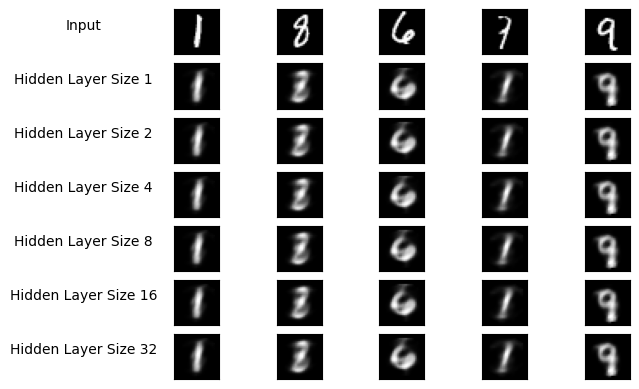

In [ ]:
#plot the digits for each dimension of latent layer
labels = ['Input']
for i in range(1, 7):
  labels.append('Hidden Layer Size: ' + str(2**(i-1)))

plt, ax, plots = plotDigits([x_test_reshaped] + outputs, cols=5)

for i in range(7):
  ax[i, 0].set_ylabel(labels[i], rotation='horizontal', labelpad=65)

plt.plot()

## Denoising using autoencoder

In [ ]:
#create noises for the training and test datasets as random values
train_noise = np.random.uniform(low=-0.7, high=0.7, size=(1, x_train_reshaped.shape[1]))
test_noise = np.random.uniform(low=-0.7, high=0.7, size=(1, x_test_reshaped.shape[1]))

In [ ]:
#add the noise
x_train_noise = x_train_reshaped + train_noise
x_test_noise = x_test_reshaped + test_noise
#clip the noise in the range [0,1]
x_train_noise = np.clip(x_train_noise, a_min=0, a_max=1)
x_test_noise = np.clip(x_test_noise, a_min=0, a_max=1)

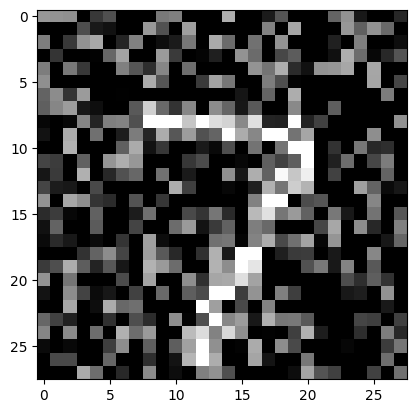

In [ ]:
plt.imshow(x_test_noise[0].reshape(28,28), cmap='gray')

In [ ]:
#create a model with latent layer dimension 100
layer_dim = 100

encoder_l1 = keras.layers.Dense(layer_dim, activation='relu', name='encoder_layer1')(input_images)
decoder_l1 = keras.layers.Dense(input_image_size, activation='sigmoid')(encoder_l1)
model = keras.Model(inputs=input_images, outputs=decoder_l1, name='autoencoder')

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
#feed the network noised data and train using dataset without noise
model.fit(x_train_noise, x_train_reshaped, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0244
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0083
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0062
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0055
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0052
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0050
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0049
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0049
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0048
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0048


In [ ]:
#predict on the noised test dataset
output = model.predict(x_test_noise)

313/313 [==============================] - 1s 3ms/step


[]

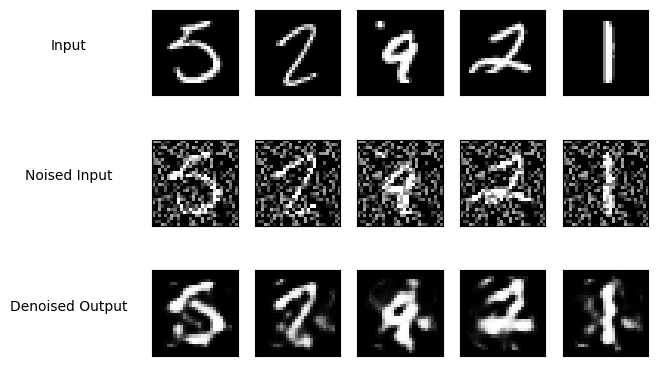

In [ ]:
labels = ['Input', 'Noised Input', 'Denoised Output']

plt, ax, plots = plotDigits([x_test_reshaped] + [x_test_noise, output], cols=5)

for i in range(3):
  ax[i, 0].set_ylabel(labels[i], rotation='horizontal', labelpad=60)

plt.plot()

#Sequential Model

In [ ]:
def generateData(t0=0, t1=5, b0= 0.5, b1=1, k0=5, k1=10, units=50, samples=500):
  #damping constant b and spring constant k
  bk = np.zeros((samples, 2))
  bk[0, 0] = b0
  bk[0, 1] = b1
  omega = np.sqrt(bk[0, 1] - bk[0, 0]**2/4)
  db = (b1-b0)/samples
  dk = (k1-k0)/samples

  t = (np.linspace(t0, t1, units)).reshape(1, units)
  xt = np.zeros((samples, units))

  for i in range(samples):
    xt[i,:] = (np.exp(-bk[i, 0]*t/2)*np.cos(omega*t))#.reshape(1, N)
    if i<samples-1:
      bk[i+1, 0] = bk[i, 0] + db
      bk[i+1, 1] = bk[i, 1] + dk
      omega = np.sqrt(bk[i+1, 1] -bk[i+1, 0]**2/4)

  return xt, bk

In [ ]:
class SimpleDense(tf.keras.layers.Layer):
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):
    input_dim = input_shape[-1]

    self.W = self.add_weight(shape=(input_dim, self.units), initializer='random_normal')
    self.B = self.add_weight(shape=(self.units,), initializer='zeros')

  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.B
    if self.activation is not None:
      y = self.activation(y)

    return y

In [ ]:
layer1 = SimpleDense(500, activation=tf.nn.relu)
layer2 = SimpleDense(100, activation=tf.nn.relu)
layer3 = SimpleDense(2, activation=tf.nn.relu)

#out1 = layer1(xt)
#out2 = layer2(out1)
#out3 = layer3(out2)

In [ ]:
model = tf.keras.Sequential([layer1, layer2, layer3])
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics='accuracy')

In [ ]:
train_xt, train_bk = generateData()
len(train_xt)

500

In [ ]:
experimental_error_xt = tf.random.uniform(train_xt.shape, minval=-0.02, maxval=0.2)
experimental_error_bk = tf.random.uniform(train_bk.shape, minval=-0.01, maxval=0.01)

In [ ]:
train_xt += experimental_error_xt
train_bk += experimental_error_bk

In [ ]:
history = model.fit(train_xt, train_bk, epochs=10, batch_size=100)

Epoch 1/10
5/5 [==============================] - 1s 7ms/step - loss: 6.9688 - accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 3.1056 - accuracy: 0.8000
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 0.6432 - accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 0.1942 - accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0921 - accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0541 - accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0404 - accuracy: 1.0000
Epoch 8/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0494 - accuracy: 1.0000
Epoch 9/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0248 - accuracy: 1.0000
Epoch 10/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0593 - accuracy: 1.0000


In [ ]:
history.history

{'loss': [6.968836307525635,
  3.1056036949157715,
  0.6432175636291504,
  0.194175124168396,
  0.09207236021757126,
  0.05411961302161217,
  0.04040118306875229,
  0.049377743154764175,
  0.02481990121304989,
  0.05934041738510132],
 'accuracy': [0.0, 0.800000011920929, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_dense_3 (SimpleDens  (100, 500)                25500     
 e)                                                              
                                                                 
 simple_dense_4 (SimpleDens  (100, 100)                50100     
 e)                                                              
                                                                 
 simple_dense_5 (SimpleDens  (100, 2)                  202       
 e)                                                              
                                                                 
Total params: 75802 (296.10 KB)
Trainable params: 75802 (296.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
test_xt, test_bk = generateData(t0=5, t1=10, b0=1, b1=1.5, k0=5, k1=8, units=50, samples=100)

In [ ]:
predictions_xt = model.predict(test_xt, batch_size=100)

1/1 [==============================] - 0s 89ms/step


In [ ]:
predictions_xt[:10,:]

array([[0.08352647, 0.2975991 ],
       [0.08414876, 0.30254444],
       [0.0847252 , 0.30774036],
       [0.08527549, 0.31320748],
       [0.08580416, 0.3188531 ],
       [0.08625609, 0.32466888],
       [0.08663864, 0.33060554],
       [0.0869591 , 0.33663023],
       [0.08721363, 0.34273103],
       [0.08739703, 0.3488141 ]], dtype=float32)

In [ ]:
test_bk[:10,:]

array([[1.   , 1.5  ],
       [1.005, 1.53 ],
       [1.01 , 1.56 ],
       [1.015, 1.59 ],
       [1.02 , 1.62 ],
       [1.025, 1.65 ],
       [1.03 , 1.68 ],
       [1.035, 1.71 ],
       [1.04 , 1.74 ],
       [1.045, 1.77 ]])

The topology of the network decides the output space or what's called _hypothesis space_. By introducing a particular structure or architecture for the network, the output is forced to lie in a certain space. In order to obtain a output space that contains the answer to the problem we want to extract from the input data, it is important to choose appropriate architecture. It is the architecture that defines what can be learned from the data.

# Functional Model

In [ ]:
#observation size
input_size = 50
#question_size
question_size = 1

#observation data
observation = keras.Input(shape=(input_size,), name='observation_time_series')
#encoder
encoder_l1 = keras.layers.Dense(500, activation='relu', name='encoder_layer_1')(observation)
encoder_l2 = keras.layers.Dense(100, activation='relu', name='encoder_layer_2')(encoder_l1)
#latent representation
latent_rep = keras.layers.Dense(3, activation='sigmoid', name='latent_representation')(encoder_l2)
#question
question = keras.Input(shape=(question_size,), name='question')
#coombine the latent representation and question
decoder_feed = keras.layers.Concatenate()([latent_rep, question])
#decoder
decoder_l1 = keras.layers.Dense(100, activation='relu', name='decoder_layer_1')(decoder_feed)
decoder_l2 = keras.layers.Dense(100, activation='relu', name='decoder_layer_2')(decoder_l1)
#answer
answer = keras.layers.Dense(1, activation='sigmoid', name='answer')(decoder_l2)

model = keras.Model(inputs=[observation, question], outputs=answer, name='damped_pendulum')

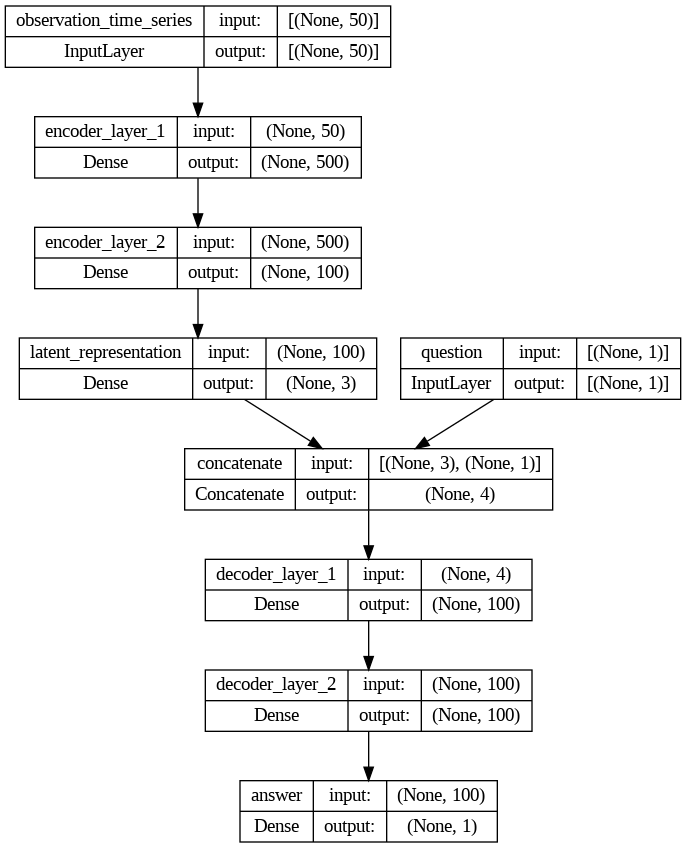

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

We can choose to build the architecture either in functional API or by creating subclass of Model class. Creating a subclass is convenient because it givesmore flexibility and can be easily reused in different examples. But, using it will compromise with the convenient features that functional API comes with viz. there is no graph structure to it so layer connectivity is not accessible it is not possible to inspect every layers and use the useful utility like summary() and plot_model. So, we will choose to take the subclass approach down the stream and create subclasses and use functional method using those subclasses. This method ensures that the layers of interest are present at the node of the model graph.

Subclasses are: Encoder and Decoder.

In the model, between Encoder and Decoder sits two layers: Latent representation and Question.

In [ ]:
class Encoder(keras.Model):
  def __init__(self, activation=None):
    super().__init__()
    self.activation = activation